# Relatório de Modelagem e Simulação - Grupo Enzo

**Membros**:
- Ísis Ardisson Logullo
- João Pedro Lukasavicus Silva
- Leonardo Martinez Ikeda
- Matheus Conceição
- Vitor Barbosa Sério

## 1 Introdução

Esse trabalho busca modelar três tipos de movimento utilizando os métodos de Euler e de Euler-Richardson. Os movimentos que serão tratados aqui são *bloco em rampa*, *movimento circular uniforme* e *movimento pendular*.

### 1.1 Bloco em rampa

Esse movimento consiste em um bloco descendo uma rampa sem atrito, mas considerando a resistência do ar. As forças atuantes no carrinho são a força gravitacional ($F_g$), a de resistência do ar ($F_d$) e a força normal ($F_N$). Portanto, a força resultante ($F_r$) pode ser definida como

$\overrightarrow{F}_r(t) = \overrightarrow{F}_g + \overrightarrow{F}_N + \overrightarrow{F}_d(v(t))$

onde $v(t)$ é a velocidade do objeto no instante $t$.

Sabemos que

$F_g = mg$

onde $m$ é a massa do objeto e $g$ é a aceleração da gravidade ($\approx \text{9,8m/s}^2$).

Além disso, sendo $\overrightarrow{F}_{g,x}$ e $\overrightarrow{F}_{g,y}$ as componentes de $F_g$ perpendicular e paralela ao plano da rampa, respectivamente (ou seja, $F_{g,x} = F_g \text{cos}(\theta)$ e $F_{g,y} = F_g \text{sen}(\theta)$, com $\theta$ sendo a inclinação da rampa), podemos dizer que

$\overrightarrow{F}_N = - \overrightarrow{F}_{g,x}$ e $\overrightarrow{F}_d$ possui sentido oposto a $\overrightarrow{F}_{g,y}$

Portanto,

$F_r(t) = F_g \text{sen}(\theta) - F_d(v(t))$

Agora, como o ar possui viscosidade muito baixa ($\approx \text{1,81} \times 10^{-5} \text{kg/(m.s)}$) e a velocidade do objeto é, em média, alta (em comparação com a viscosidade do ar), temos que

$F_d(v(t)) \approx - C v(t) \ | \ v(t) \ |$

onde $C$ é um coeficiente tal que $C \propto \rho_{ar} A$

com $\rho_{ar}$ sendo a densidade do ar ($\approx \text{1,2kg/m}^3$) e $A$, a área frontal do objeto. No caso desse experimento, $v(t) \geq 0 \ \forall \ t$, então

$F_d(v(t)) \approx -C v^2(t)$

Logo,

$F_r(t) = mg\text{sen}(\theta) - C v^2(t) \Rightarrow a(t) = \cfrac{dv}{dt} = g\text{sen}(\theta) - \cfrac{C v^2(t)}{m}$

Portanto, a equação que descreve o movimento de um bloco em rampa, com resistência do ar, é:

$\cfrac{d^2s}{dt^2} = g\text{sen}(\theta) - \cfrac{C}{m}\left(\cfrac{ds}{dt}\right)^2$

Com $s(t)$ sendo a função de deslocamento linear em função do tempo.

### 1.2 Movimento Circular Uniforme

Esse movimento consiste em um objeto se movendo por uma trajetória circular e com velocidade angular constante. Como a trajetória é circular, sendo $F_c$ a força centrípeta sobre o objeto, temos que a força resultante é dada por

$\overrightarrow{F}_r = \overrightarrow{F}_c$

Nós sabemos que

$F_c  = m \omega^2 R$

onde $m$ é a massa do objeto, $\omega$ é a velocidade angular do objeto e $R$ é o raio da trajetória. Portanto, podemos dizquer que o deslocamento angular em função do tempo ($\theta(t)$) pode ser dado por

$\theta(t) = \theta_0 + \omega t$

com $\theta_0$ sendo a posição angular inicial do objeto.

Então,

$\theta(t) = \theta_0 + \cfrac{d \theta}{dt} t$

é a equação que descreve o movimento circular uniforme.

### 1.3 Pêndulo

Esse movimento consiste em um pêndulo oscilando considerando a resistência do ar como não nula. Vamos considerar, porém, que a massa da corda do pêndulo é desprezível. Como o pêndulo é composto por uma massa presa a uma corda (ou haste) e como a resistência do ar não está sendo desprezada, podemos dizer que a força resultante é dada por

$\overrightarrow{F}_r(t) = \overrightarrow{F}_g + \overrightarrow{F}_T(t) + \overrightarrow{F}_d(v(t))$

onde $F_T(t)$ é a tensão na corda no instante $t$.

Para simplificar os cálculos, vamos considerar apenas as componentes que alteram a magnitude da velocidade do objeto, que são as compoentes tangentes à tragetória do mesmo (os outros componentes alteram apenas a direção). Então, podemos simplificar a expressão acima como

$F^*_r(t) = - F_g \text{sen}(\theta(t)) - F_d(v(t))$

onde $\theta(t)$ é a inclinação do pêndulo no instante $t$. Estamos considerando que, quando o pêndulo está inclinado para a esquerda, $\theta(t) < 0$, e, quando está inclinado para a direita, $\theta(t) > 0$. $\theta(t) = 0$ ocorre quando a corda do pêndulo está perpendicular ao solo.

Novamente, podemos dizer que $F_d(v(t)) \approx C v(t) \ | \ v(t) \ |$, então,

$F^*_r(t) = - m g \text{sen}(\theta(t)) - C v(t) \ | \ v(t) \ |$

Como a trajetória é um arco de raio $L$ (o comprimento da corda), podemos dizer que

$v(t) = \omega(t) L = \cfrac{d\theta}{dt} L$ e $a(t) = \alpha(t) L = \cfrac{d^2\theta}{dt^2} L$

onde $\omega(t)$ e $\alpha(t)$ são a velocidade e aceleração angulares do objeto no instante $t$, respectivamente.

Portanto, como

$a(t) = - g \text{sen}(\theta(t)) - \cfrac{C v(t) \ | \ v(t) \ |}{m}$,

podemos dizer que a equação que descreve o movimento pendular, com resistência do ar é

$\cfrac{d^2 \theta}{dt^2} = - \cfrac{g}{L} \text{sen}(\theta(t)) - \cfrac{C L}{m} \cfrac{d\theta}{dt} \left|\cfrac{d\theta}{dt}\right|$

### 1.4 Vídeo e inicialização do programa

Abaixo um link para o vídeo do experimento realizado.

https://youtu.be/ragttcqUsAg

Agora, para iniciar o programa, vamos primeiro importar as bibliotecas que serão utilizadas e já declarar as funções auxiliares.

In [1]:
##################################
#          BIBLIOTECAS           #
##################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import display
import math

pd.options.mode.chained_assignment = None

####################################################################################################################################

##################################
#           FUNCOES              #
##################################
 
def integrate(x, y, y0 = 0):
    '''
    array, array, object --> array
    
    Recebe dois vetores com dados e retorna um vetor de mesmo tamanho, que seria o resultado da integral de y em x.
    y0 é o valor inicial da integral.
    '''
    yi = [y0]
    
    for i in range(1, min(len(x), len(y))):
        dy = ((y[i-1] + y[i]) / 2) * (x[i] - x[i-1])
        yi.append(yi[i-1] + dy)
        
    return yi

####################################################################################################################################

def derivate(x, y, y0 = 0):
    '''
    array, array, object --> array
    
    Recebe dois vetores com dados e retorna um vetor de mesmo tamanho, que seria o resultado da derivada de y em x.
    y0 é o valor inicial da derivada.
    '''
    yi = [y0]
    
    for i in range(1, min(len(x), len(y))):
        dy = y[i] - y[i-1]
        dx = x[i] - x[i-1]
        if dx == 0:
            yi.append(dy)
        else:
            yi.append(dy / dx)
        
    return yi

####################################################################################################################################

def frange(start, stop, step=1.0):
    '''
    float, float, float --> void
    
    Gera um iterável, semelhante à função range(), mas com valores tipo float.
    '''
    
    i = start
    while i < stop:
        yield i
        i += step

####################################################################################################################################

def erro(df, dft1, dft2, x):
    '''
    DataFrame, DataFrame, DataFrame, str ou int --> void
    
    Recebe os Dataframes com os valores experimentias e teóricos e calcula erro da variável x para cada um dos métodos utilizados.
    '''
    e1 = []
    e2 = []
    
    for i in range(len(df)):
        j = math.floor(df['time'][i] * 1000)
        e1.append(df[x][i] - dft1[x][j])
        e2.append(df[x][i] - dft2[x][j])
        
    df[x + '_e1'] = e1
    df[x + '_e2'] = e2

####################################################################################################################################    

def plot_experimentos(df, x, labels = '', units = '', exp = ''):
    '''
    DataFrame, array, array, array, str --> void
    
    Recebe os valores experimentais e plota os gráficos das variáveis em x, para cada uma das repetições feitas.
    
    x = variáveis que devem ser plotadas em funçao do tempo
    labels = nome dos eixos para as varáveis em x
    units = unidade dos eixos para as variáveis em x
    exp = nome do experimento
    '''
    h = len(x)
    fig, plots = plt.subplots(h, 5, sharex = 'col', sharey = 'row')
    fig.set_figwidth(20)
    fig.set_figheight(4 * h)
    fig.subplots_adjust(hspace = 0.05, wspace = 0, top = 0.93)
    fig.suptitle('Valores experimentais para os experimentos de ' + exp)
    fig.set_facecolor('#FFFFFF')
    for i in range(5):
        j = 0
        plots[j, i].scatter(df[i]['time'], df[i][x[j]], s = 1 if h == 3 else 10)
        plots[j, i].set_title('Experimento ' + str(i+1))
        
        if h == 3:
            j += 1
            plots[j, i].scatter(df[i]['time'], df[i][x[j]], s = 1)
        
        j += 1 
        plots[j, i].scatter(df[i]['time'], df[i][x[j]], s = 1 if h == 3 else 10)
        plots[j, i].set_xlabel('Tempo (s)')
        
    j = 0
    plots[j, 0].set_ylabel(labels[j] + ' (' + units[j] + ')')
    
    if h == 3:
        j += 1
        plots[j, 0].set_ylabel(labels[j] + ' (' + units[j] + ')')
    
    j += 1
    plots[j, 0].set_ylabel(labels[j] + ' (' + units[j] + ')')
    
    plt.show()

####################################################################################################################################
    
def plot_modelos(df, dft1, dft2, x, labels = '', units = '', exp = ''):
    '''
    DataFrame, DataFrame, DataFrame, array, array, array, str --> void
    
    Recebe os valores experimentais e teóricos e plota os gráficos comparando os dois modelos sobrepostos aos valores experimentais,
    seguido de seus erros.
    
    x = variáveis que devem ser plotadas em funçao do tempo
    labels = nome dos eixos para as varáveis em x
    units = unidade dos eixos para as variáveis em x
    exp = nome do experimento
    '''
    def plot_modelo(plots, df, dft, x, i = 0, m = 1):
        '''
        array, DataFrame, DataFrame, array, int, int --> void
        
        Recebe os valores experimentais e os e um dos modelos e imprime os valores e erros referentes à variável x
        '''
        i *= 2
        m -= 1
        plots[i, m].scatter(df['time'], df[x], s = 1)
        plots[i, m].plot(dft['time'], dft[x], color = 'C1')
        plots[i, m].set_xticklabels([])
        
        i += 1
        plots[i, m].set_xlabel('Tempo (s)')
        plots[i, m].scatter(df['time'], df[x + '_e' + str(m+1)], s = 1)
        plots[i, m].plot([0, max(df['time'])], [0, 0], '--', color = 'C1')
        
    h = len(x)
        
    fig, plots = plt.subplots(2 * h, 2, sharey = 'row')
    fig.set_figwidth(10)
    fig.set_figheight(8 * h)
    fig.subplots_adjust(wspace = 0, top = 0.93)
    fig.suptitle('Comparação dos resultados do método de Euler com o método\nde Euler-Richardson para os experimentos de ' + exp)
    fig.set_facecolor('#FFFFFF')
    
    plots[0, 0].set_title('Método de Euler')
    plots[0, 1].set_title('Método de Euler-Richardson')
    for i in range(h):
        plot_modelo(plots, df, dft1, x[i], i = i, m = 1)
        plot_modelo(plots, df, dft2, x[i], i = i, m = 2)
        plots[2*i, 0].set_ylabel(labels[i] + ' (' + units[i] + ')')
        plots[2*i+1, 0].set_ylabel('Erro de ' + labels[i] + ' (' + units[i] + ')')
        
####################################################################################################################################

##################################
#      LEITURA DOS DADOS         #
##################################

############ Constantes ###########

g = 9.8                 # aceleração da gravidade (m/s^2)
par = 1.2               # densidade do ar         (kg/m^3)

####################################################################################################################################
########## Bloco em rampa #########
thetar = 6 * math.pi / 180  # inclinacao              (rad)
D = 3.64                    # distância percorrida    (m)
mr = 0.34                   # massa do bloco          (g)
Ar = 0.008                  # área frontal do bloco   (m^2)
r = []                      # lista para armazenar os dados do acelerometro

for i in range(5):
    # lendo dados do acelerometro
    r.append(pd.read_csv('r' + str(i+1) + '.csv'))
    
####################################################################################################################################
############### MCU ###############
R = 2.1                     # raio (m)
t = pd.read_csv('mcu.csv')  # tabela com os dados dos tempos das voltas
c = []                      # lista para armazenar os tempos medidos pra cada experimento

for i in range(5):
    c.append(t.loc[t['rep'] == i+1])
    c[i] = c[i].reset_index()
    c[i] = c[i].filter(items=['time', 'theta'])

####################################################################################################################################
############# Pêndulo #############
l = 0.823                               # comprimento das cordas                     (m)
a = 0.051                               # largura do cesto                           (m)
b = 0.144                               # comprimento do cesto                       (m)
L = math.sqrt(l**2 - (a/2)**2 - (b/2)**2)  # comprimento da corda imaginária do pêndulo (m)
mp = 0.2                                # massa do pendulo                           (kg)
Ap = 0.0059                             # área frontal do pêndulo                    (m^2)
p = []                                  # lista para armazenar os dados do giroscópio
theta0 = []                             # inclinação inicial

for i in range(5):
    # lendo dados do giroscópio
    p.append(pd.read_csv('p' + str(i+1) + '.csv'))

## 2 Método

Para cada um dos tês movimentos escolhidos para esse trabalho foi realizado um experimento, repetido cinco vezes seguidas, e alguns dados experimentais foram coletados durante as realizações destes, conforme explicado nas seções a seguir.

### 2.1 Bloco em rampa

#### 2.1.1 Coleta dos dados

O experimento de bloco em rampa foi realizado utilizando um celular preso a um carrinho leve, para simular uma descida sem atrito. Além disso, foram utilizadas cordas de barbante como guias para que o carrinho descesse por uma trajetória o mais reta o possível. Conforme o "bloco" descia a rampa, o celular media a aceleração linear do mesmo, utilizando o aplicativo *Physics Toolbox*.

Antes de o carrinho ser solto, era dado um intervalo de alguns segundos e, após parar o carrinho, também.

#### 2.1.2 Limpeza dos dados

Primeiro, é preciso remover os valores de variáveis coletados pelo *Physics Toolbox* que não serão úteis para este trabalho. Neste caso, os únicos valores interessantes são os de tempo e os da aceleração linear no eixo $x$. Todos os outros valores podem ser removidos.

Após isso, é necessário remover os valores iniciais do acelerômetro, que correspondem ao intervalo de alguns segundos dado antes de se iniciar o experimento de fato e o bloco estava imóvel no topo da rampa. Esses tempos iniciais foram estimados visualmente para cada um dos 5 experimentos, conforme o gráfico abaixo.

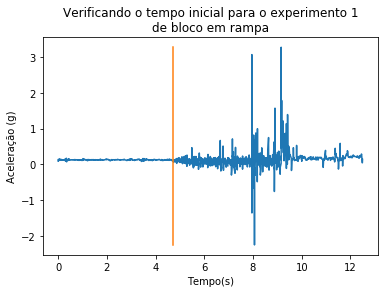

In [2]:
fig, (plot) = plt.subplots(1)
fig.set_facecolor('#FFFFFF')
plot.plot(r[0]['time'], r[0]['gFx'])
plot.plot([4.7, 4.7], [min(r[0]['gFx']), max(r[0]['gFx'])], color = 'C1')
plot.set_title('Verificando o tempo inicial para o experimento 1\nde bloco em rampa')
plot.set_xlabel('Tempo(s)')
plot.set_ylabel('Aceleração (g)')
plt.show()

Isso foi repetido para cada um dos 5 experimentos, obtendo os tempos iniciais de 4,7s, 2,9s, 6,2s, 4,6s e 4,5s.

Além disso, também é preciso arrumar os valores da aceleração medidos, pois os mesmos são dados pelo acelerômetro como proporcões da aceleração gravitacional. Para fazer essa conversão, basta muliplicar todos os valores por $g$.

Com isso, podemos agora estimar valores experimentais para a velocidade e o deslocamento ao longo do tempo "integrando" os valores do acelerômetro pela Regra dos Trapésios, para obter a velocidade experimental e integrando novamente para obter o deslocamento experimental com as seguintes fórmulas

$v_{i+1} = v_i + \cfrac{a_i + a_{i+1}}{2} (t_{i+1} - t_i)$

$s_{i+1} = s_i + \cfrac{v_i + v_{i+1}}{2} (t_{i+1} - t_i)$

onde $i \geq 0$ e referente ao i-ésimo valor observado e contido na tabela de dados e $s_0 = 0$, $v_0 = 0$ e $a_0 = g \text{sen}(\theta_r)$, com $\theta_r$ sendo a inclinação da rampa.

Agora, além do tempo inicial que já foi descartado, há também um tempo final que não interessa. Como temos o deslocamento experimental e sabemos que a rampa possui comprimento $D$, todos os valores com deslocamento maior que esse comprimento foram descartados.

#### 2.1.3 Modelagem

Finalmente, pôde-se estimar pontos teóricos utilizando os métodos de Euler e de Euler-Richardson, para serem depois comparados com os pontos experimentais e também comparar ambos os métodos. Os valores iniciais utilizados para ambos os métodos foram

$s_r(0) = 0\text{m}$

$v_r(0) = 0\text{m/s}$

$a_r(0) = g \text{sen}(\theta_r)$

### 2.2 Movimento circular uniforme

#### 2.2.1 Coleta dos dados

O experimento foi realizado diretamente por duas pessoas: uma ficava no centro de um círculo e outra ficava na extremidade do mesmo. Ambas as pessoas seguravam uma corda de comprimento $R$ esticada e a pessoa no centro só podia girar em torno de si mesma. Assim, foi possível obter uma trajetória aproximadamente circular de raio $R$. A pessoa na extremidade, então, andava com velocidade aproximadamente constante (com ritmo determinado por um metrônomo).

Outras duas pessoas ficaram posicionadas nos pontos de meio-círculo e de um círculo total segurando um cronômetro para medir os instantes de tempo em que a pessoa que estava andando passava por esses pontos. Para cada uma das cinco repetições, foram realizada três voltas, dando um deslocamento angular total de aproximadamente $6 \pi$ radianos.

#### 2.2.2 Limpeza dos dados

Os tempos obtidos foram referentes a cada uma das voltas. Porém como cada um dos 5 experimentos consistiu em três voltas consecutivas, é mais interessante que os tempos sejam somados de forma a se obter os tempos totais de cada experimento. Além disso, o deslocamento angular está dado como 1 e 2, onde 1 se refere a meia-volta e 2 a uma volta completa. Esses valores também precisam ser convertidos para $\pi, 2\pi, \dots, 6\pi$, que seriam os valores do deslocamento angular.

Finalmente, podemos estimar a velocidade angular média experimenta ao longo de cada experimento "derivando" o deslocamento angular no tempo com a fórmula

$\omega_{i+1} = \cfrac{\theta_{i+1} - \theta_i}{t_{i+1} - t_i}$

com $i > 0$ e referente ao i-ésimo valor observado e contido na tabela de dados e $\theta_0 = 0$ e $t_0 = 0$

#### 2.2.3 Modelagem

Para aplicarmos os métodos de Euler e de Euler-Richardson, foram considerados os seguintes valores

$\theta_r(0) = 0$rad

$\omega_r = \cfrac{\sum_{i=1}^n \omega_i}{n}$

onde $n$ é o total de estimativas feitas.

### 2.3 Movimento pendular

#### 2.3.1 Coleta de dados

Para o movimento pendular, foi utilizado um celular dentro de um cesto, preso por quatro cordas em cada uma das extremidades do mesmo e eram amarradas uma a outra, deforma a formar uma pirâmide retangular reta. Assim, podemos considerar que o pêndulo possui uma corda simples de comprimento $L$, onde $L$ é a altura dessa pirâmide.

O pêndulo era entâo solto com uma inclinação inicial de aproximadamente $-30^\circ$ e era deixado oscilando por um tempo. Enquanto o pêndulo oscilava, o celular media a velocidade angular do mesmo, utilizando o *Physics Toolbox*.

#### 2.3.2 Limpeza dos dados

De forma semelhante ao explicado na seção 2.1.2, os valores da velocidade angular nos eixos $y$ e $z$ e o valor total não são necessários e podem ser removidos. Além disso, os dados iniciais também precisam ser removidos e os tempos iniciais foram determinados visualmente, como no gráfico abaixo.

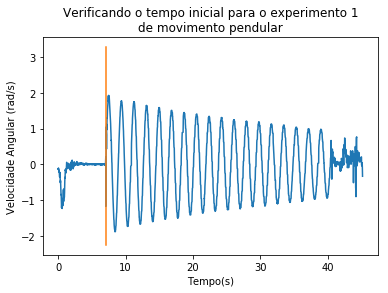

In [3]:
fig, (plot) = plt.subplots(1)
fig.set_facecolor('#FFFFFF')
plot.plot(p[0]['time'], p[0]['wx'])
plot.plot([7.05, 7.05], [min(r[0]['gFx']), max(r[0]['gFx'])], color = 'C1')
plot.set_title('Verificando o tempo inicial para o experimento 1\nde movimento pendular')
plot.set_xlabel('Tempo(s)')
plot.set_ylabel('Velocidade Angular (rad/s)')
plt.show()

Isso foi repetido para cada uma das cinco repetições, obtendo, assim, os tempos iniciais como sendo 7,05, 5,15, 5,2, 5,15 e 5,3 segundos para cada uma delas.

Agora, como limite superior, foi determinado um valor arbitrário de forma que cada experimento tivesse uma duração de 30s.

Após isso, pode-se calcular a inclinação experimental no tempo "integrando" os valores da velocidade angular. Porém, como a inclinação inicial exata é desconhecida, faz-se a integração dos pontos com $\theta_0 = 0$. Então, podemos estimar a inclinação inicial real como sendo $\theta_0 = \theta_\text{max} / 2$. Esse novo valor de $\theta_0$ é então utilizado para recalcular a inclinação ao longo do tempo.

Além da inclinação ao longo do tempo é também necessário calcular a aceleração angular. Isso pode ser feito "derivando" os valores da velocidade angular. As fórmulas utilizadas, portanto, foram

$\theta^*_{i+1} = \theta^*_i + \cfrac{\omega_i + \omega_{i+1}}{2} (t_{i+1} - t_i)$

$\theta_{i+1} = \theta_i + \cfrac{\omega_i + \omega_{i+1}}{2} (t_{i+1} - t_i)$

$\alpha_{i+1} = \cfrac{\omega_{i+1} - \omega_i}{t_{i+1} - t_i}$

com $i \geq 0$, $\theta^*_0 = 0$, $\theta_0 = -\text{max}\{\theta^*_i, i = 1, 2, \dots, n\} / 2$, $\omega_0 = 0$ e $t_0 = 0$.

#### 2.3.3 Modelagem

Finalmente, para a modelagem com os métodos de Euler e Euler-Richardson, foram utilizados os valores

$\theta_{p}(0) = \cfrac{\sum^5_{j=1} \theta_{0,j}}{5}$

$\omega_p(0) = 0$rad/s

$\alpha_p(0) = - \cfrac{g}{L} \text{sen}(\theta_{p}(0))$

onde $j$ representa a $j$-ésima repetição do experimento

### 2.4 Encerramento

O código abaixo realiza todas as operações citadas nas seções de 2.1 a 2.3

In [4]:
####################################################################################################################################
    
##################################
#       LIMPEZA DOS DADOS        #
##################################
    
########## Bloco em rampa #########
    
tmin_r = [4.7, 2.9, 6.2, 4.6, 4.5]  # tempos iniciais estimados (s)

for i in range(5):
    # removendo variáveis que não serão utilizadas
    r[i] = r[i].filter(items=['time', 'gFx'])
    r[i].columns = ['time', 'a']
    # removendo dados antes do tempo inicial estimado
    r[i] = r[i].loc[r[i]['time'] >= tmin_r[i]]
    r[i] = r[i].reset_index(drop = True)
    # convertendo valores para m/s^2
    r[i].update(pd.Series(r[i]['a'] * g, name = 'a'))  
    # 'zerando' o tempo
    r[i].update(pd.Series(r[i]['time'] - tmin_r[i], name = 'time'))
    # calculando as velocidades experimentais
    r[i]['v'] = integrate(r[i]['time'], r[i]['a'])
    # calculando o deslocamento experimental
    r[i]['d'] = integrate(r[i]['time'], r[i]['v'])
    # filtrando dados com deslocamento maior que o tamanho total da rampa
    r[i] = r[i].loc[r[i]['d'] <= D]
    
############### MCU ###############
    
for i in range(5):
    c[i]['theta'][0] = 1*math.pi
    c[i]['theta'][1] = 2*math.pi
    for j in [2, 4]:
        c[i]['theta'][j] = (j+1)*math.pi
        c[i]['theta'][j+1] = (j+2)*math.pi
        c[i]['time'][j] += c[i]['time'][j-1]
        c[i]['time'][j+1] += c[i]['time'][j-1]
    c[i]['w'] = derivate(c[i]['time'], c[i]['theta'], y0 = c[i]['theta'][0] / c[i]['time'][0])
    
############# Pêndulo #############
    
tmin_p = [7.05, 5.15, 5.2, 5.15, 5.3]   # tempos iniciais estimados (s)

for i in range(5):
    # removendo variáveis que não serão utilizadas
    p[i] = p[i].filter(items=['time', 'wx'])
    p[i].columns = ['time', 'w']
    # removendo dados fora do intervalo alvo
    p[i] = p[i].loc[(p[i]['time'] >= tmin_p[i]) & (p[i]['time'] <= tmin_p[i] + 30)]
    p[i] = p[i].reset_index(drop = True)
    # 'zerando' o tempo
    p[i].update(pd.Series(p[i]['time'] - tmin_p[i], name = 'time'))
    # calculando a inclinação experimental
    p[i]['theta'] = integrate(p[i]['time'], p[i]['w'])
    # estimando a inclinação inicial
    theta0.append(-max(p[i]['theta']) / 2)
    # recalculando a inclinação experimental
    p[i].update(pd.Series(integrate(p[i]['time'], p[i]['w'], y0 = theta0[i]), name = 'theta'))
    # calculando a aceleração angular
    p[i]['a'] = derivate(p[i]['time'], p[i]['w'], y0 = g * math.sin(theta0[i]) / L)
    
####################################################################################################################################

##################################
#             MODELO             #
##################################

re = r[0]
ce = c[0]
pe = p[0]

for i in range(1,5):
    re = re.append(r[i], ignore_index = True)
    ce = ce.append(c[i], ignore_index = True)
    pe = pe.append(p[i], ignore_index = True)

########## Bloco em rampa #########

Br = par * Ar / mr * 4
Ar = g * math.sin(thetar)

tmax = max(re['time'])

dt = 0.001

eur1 = pd.DataFrame({'time' : list(frange(0.0, tmax, dt)),
                    'd' : 0.0,
                    'v' : 0.0,
                    'a' : 0.0})

eur1['d'][0] = 0.0
eur1['v'][0] = 0.0
eur1['a'][0] = Ar
    
for i in range(1, len(eur1)):
    eur1['d'][i] = eur1['d'][i-1] + eur1['v'][i-1] * dt
    eur1['v'][i] = eur1['v'][i-1] + eur1['a'][i-1] * dt
    eur1['a'][i] = Ar - Br * eur1['v'][i] ** 2

eur2 = pd.DataFrame({'time' : list(frange(0.0, tmax, dt)),
                    'd' : 0.0,
                    'v' : 0.0,
                    'a' : 0.0})

eur2['d'][0] = 0.0
eur2['v'][0] = 0.0
eur2['a'][0] = Ar
    
for i in range(1, len(eur2)):
    vmid = eur2['v'][i-1] + eur2['a'][i-1] * dt / 2
    amid = Ar - Br * vmid ** 2
    eur2['v'][i] = eur2['v'][i-1] + amid * dt
    eur2['d'][i] = eur2['d'][i-1] + vmid * dt
    eur2['a'][i] = Ar - Br * eur2['v'][i] ** 2
    
erro(re, eur1, eur2, 'd')
erro(re, eur1, eur2, 'v')
erro(re, eur1, eur2, 'a')


############### MCU ###############

wc = np.mean(ce['w'])

tmax = max(ce['time'])
    
euc1 = pd.DataFrame({'time' : list(frange(0.0, tmax, dt)),
                    'theta' : 0.0})

euc1['theta'][0] = 0.0
    
for i in range(1, len(euc1)):
    euc1['theta'][i] = euc1['theta'][i-1] + wc * dt
euc1['w'] = wc

euc2 = pd.DataFrame({'time' : list(frange(0.0, tmax, dt)),
                    'theta' : 0.0})

euc2['theta'][0] = 0.0
    
for i in range(1, len(euc2)):
    euc2['theta'][i] = euc2['theta'][i-1] + wc * dt
euc2['w'] = wc
    
erro(ce, euc1, euc2, 'theta')
erro(ce, euc1, euc2, 'w')

############# Pêndulo #############

Bp = par * Ap * L / mp
thetap0 = np.mean(theta0)
Ap = g / L

tmax = max(pe['time'])

eup1 = pd.DataFrame({'time' : list(frange(0.0, tmax, dt)),
                    'theta' : 0.0,
                    'w' : 0.0,
                    'a' : 0.0})

eup1['theta'][0] = thetap0
eup1['w'][0] = 0.0
eup1['a'][0] = - Ap * math.sin(thetap0)
    
for i in range(1, len(eup1)):
    eup1['theta'][i] = eup1['theta'][i-1] + eup1['w'][i-1] * dt
    eup1['w'][i] = eup1['w'][i-1] + eup1['a'][i-1] * dt
    eup1['a'][i] = -Ap * math.sin(eup1['theta'][i]) - Bp * eup1['w'][i] * abs(eup1['w'][i])

eup2 = pd.DataFrame({'time' : list(frange(0.0, tmax, dt)),
                    'theta' : 0.0,
                    'w' : 0.0,
                    'a' : 0.0})

eup2['theta'][0] = thetap0
eup2['w'][0] = 0.0
eup2['a'][0] = -Ap * math.sin(thetap0)
    
for i in range(1, len(eup2)):
    thetamid = eup2['theta'][i-1] + eup2['w'][i-1] * dt / 2
    wmid = eup2['w'][i-1] + eup2['a'][i-1] * dt / 2
    amid = -Ap * math.sin(thetamid) - Bp * wmid * abs(wmid)
    eup2['theta'][i] = eup2['theta'][i-1] + wmid * dt
    eup2['w'][i] = eup2['w'][i-1] + amid * dt
    eup2['a'][i] = -Ap * math.sin(eup2['theta'][i]) - Bp * eup2['w'][i] * abs(eup2['w'][i])
    
erro(pe, eup1, eup2, 'theta')
erro(pe, eup1, eup2, 'w')
erro(pe, eup1, eup2, 'a')

####################################################################################################################################

## 3 Dados

Para todos os experimentos, foram considerados os valores constantes $g = \text{9,8m/s}^2$ e $\rho_{ar} = \text{1,2kg/m}^3$ como aceleração da gravidade e densidade do ar, respectivamente. Além disso, para os métodos de Euler e de Euler-Richardson, foi utilizado um $\Delta t = \text{0,001s}$ para todos os experimentos.

### 3.1 Dados experimentais coletados

A seguir, vamos explicitar todos os dados experimentais que foram coletados em cada experimento e plotar os gráficos para cada repetição do experimento, para verificar que os experimentos foram bem sucedidos.

#### 3.1.1 Bloco em rampa

$\theta_r = 6^\circ$ (inclinação da rampa)

$D = \text{3,64m}$ (distância total percorrida na rampa)

$m_r = \text{0,34kg}$ (massa do bloco)

$A_r = \text{0,008m}^2$ (área frontal do bloco)

A aceleração, $a_r$, foi obtida através de medidas do acelerômetro do celular e os dados foram amazenados em uma tabela *csv*. Com esses valores foram calculados valores para as velocidades e os deslocamentos lineares experimentais e tudo foi armazenado em tabelas de dados separados.

Abaixo, o gráfico com todos os dados já calculados e plotados

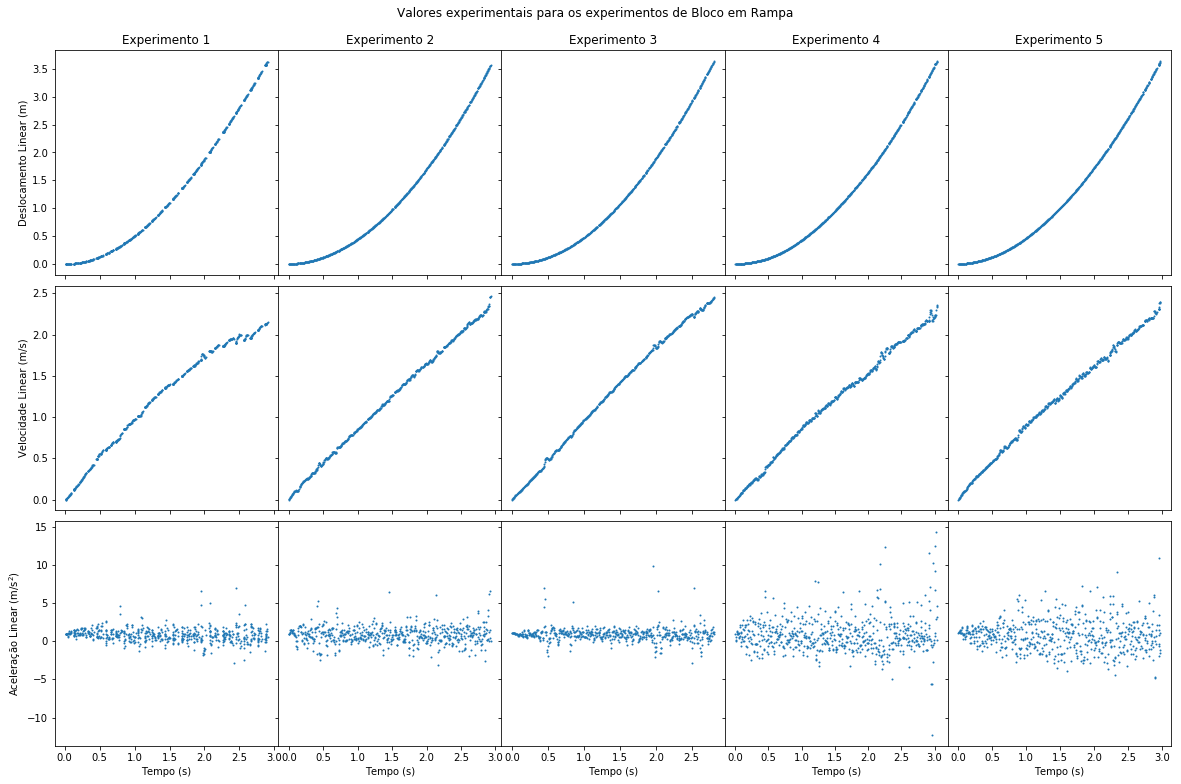

In [5]:
########## Bloco em rampa #########    

plot_experimentos(r, ['d', 'v', 'a'], labels = ['Deslocamento Linear', 'Velocidade Linear', 'Aceleração Linear'], units = ['m', 'm/s', r'm/s$^2$'], exp = 'Bloco em Rampa')


O gráfico acima mostra um resultado bastante satisfatório. A velocidade segue quase uma reta, mas possui uma leve curvatura negativa, que deve ser causada pela resistência do ar. Os pontos para a aceleração parecem igualmente distribuídos em torno de um eixo e os dados do deslocamento seguem um formato semelhante a uma parábola, o que também faz sentido dado qua a velocidade é quase uma reta.

#### 3.1.2 Movimento Circular Uniforme

$R = \text{2,1m}$ (raio da trajetória)

O tempo das voltas, $t$, foi obtido manualmente com um cronômetro e armazenado em uma tabela *csv*. Com esses valores, calculou-se as velocidades angulares ponto a ponto e tudo foi armazenado em tabelas de dados.

Abaixo, um gráfico ilustrando os valores obtidos

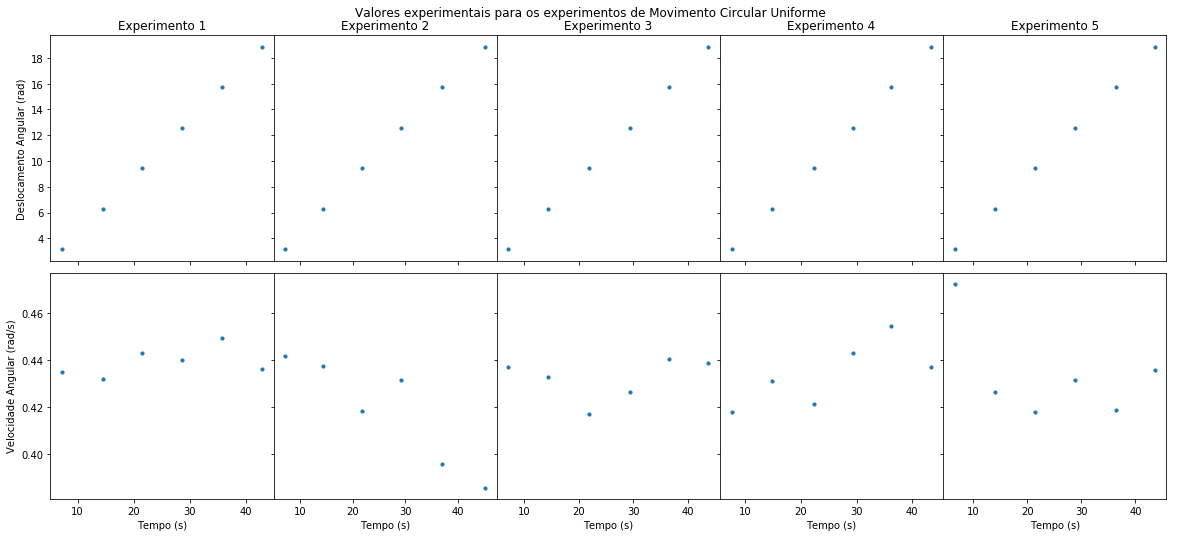

In [6]:
############### MCU ###############

plot_experimentos(c, ['theta', 'w'], labels = ['Deslocamento Angular', 'Velocidade Angular'], units = ['rad', 'rad/s'], exp = 'Movimento Circular Uniforme')


Novamente, o gráfico parece satisfazer o que se espera na teoria. O deslocamento angular segue uma reta quase perfeita e as velocidades angulares não possuem grandes variações, com a maioria dos pontos entre 0,40 e 0,46rad/s.

#### 3.1.3 Movimento Pendular

$l = \text{0,823m}$ (comprimento de cada uma das 4 cordas)

$a = \text{0,051m}$ (largura do cesto)

$b = \text{0,144m}$ (comprimento do cesto)

$L = \sqrt{l^2 - \left(\cfrac{a}{2}\right)^2 - \left(\cfrac{b}{2}\right)^2} \approx \text{0,819m} $ (comprimento da "corda imaginária" do pêndulo)

$m_p = \text{0,2kg}$ (massa do pêndulo)

$A_p = \text{0,0059m}^2$ (área frontal do pêndulo)

A velocidade angular, $\omega_p$, foi obtida através de medidas do giroscópio do celular e os dados foram armazenados em uma tabela *csv*. Com esses valores foram estimados os dados experimentais para os delocamentos e acelerações angulares e tudo foi armazenados em tabelas de dados separados.

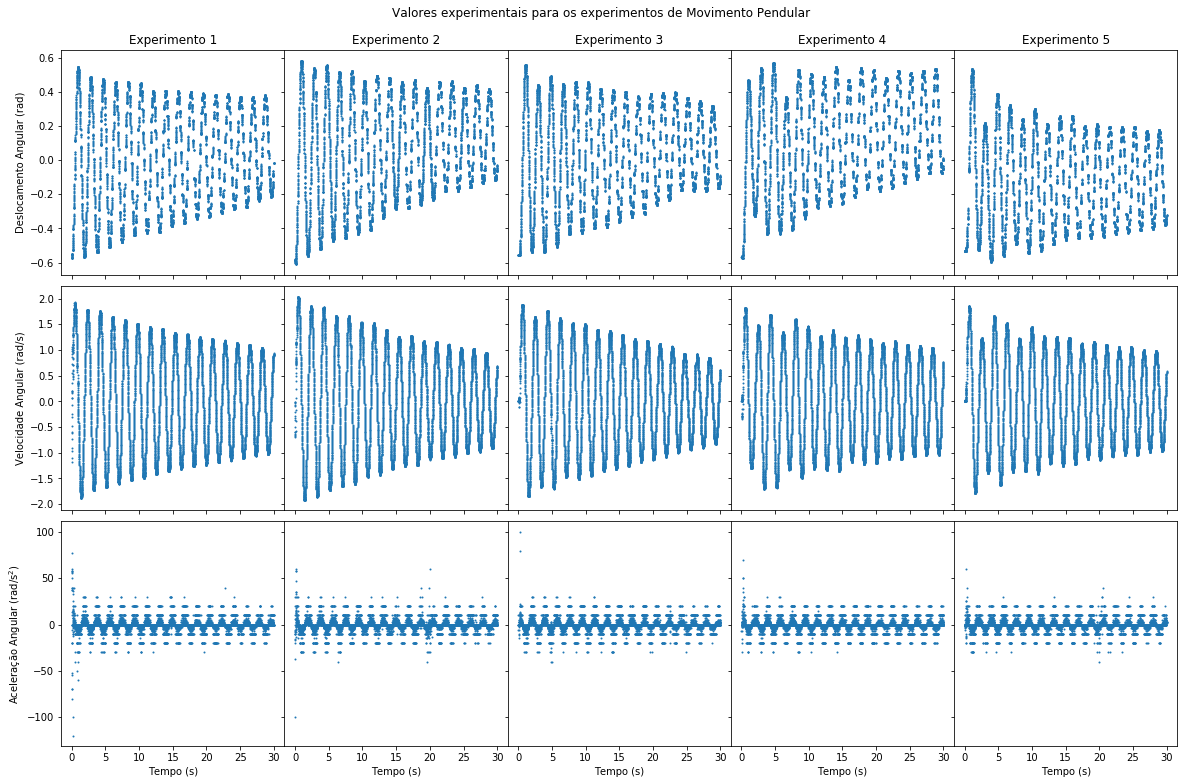

In [7]:
############# Pêndulo #############  

plot_experimentos(p, ['theta', 'w', 'a'], labels = ['Deslocamento Angular', 'Velocidade Angular', 'Aceleração Angular'], units = ['rad', 'rad/s', r'rad/s$^2$'], exp = 'Movimento Pendular')


Assim como nos outros experimentos, esses gráficos mostram resultados satistafórios, com todos se assemelhando a senóides com amplitude decrescente. Porém, os gráficos da aceleração angular é mais difícil de determinar uma redução real na amplitude e os de deslocamento angular deixam de ser simétricos em torno do eixo $x$.

### 3.2 Modelo teórico

Finalmente, vamos visualizar as equações teóricas obtidas com os dados experimentais e utilizar os métodos de Euler e Euler-Richardson para estimar os seus valores ao longo do tempo.

#### 3.2.1 Bloco em rampa

Para o experimento do bloco em rampa, a equação teórica obtida foi

$\cfrac{d^2s}{dt^2} = \text{1,024} - \text{0,113} \left(\cfrac{ds}{dt}\right)^2$

Aplicando os métodos já citados e os comparando com os dados experimentais, obtemos os gráficos abaixo

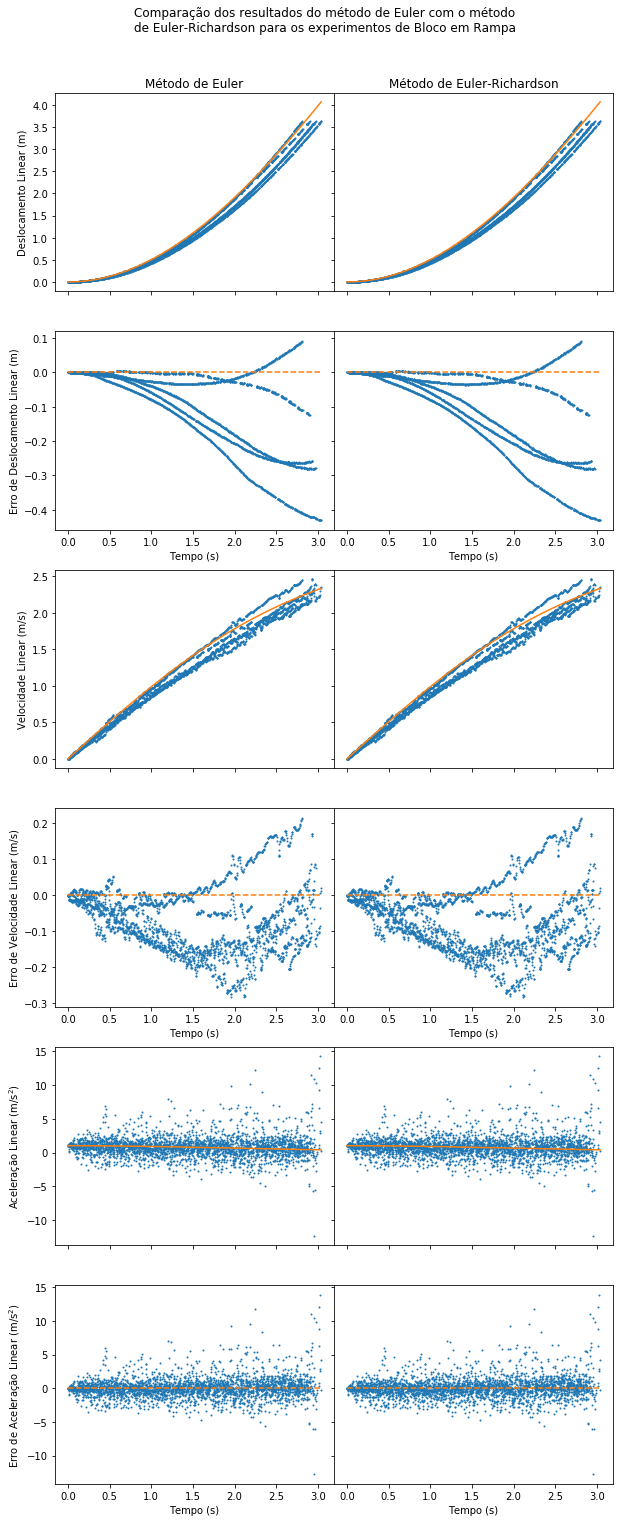

In [8]:
########## Bloco em rampa #########

plot_modelos(re, eur1, eur2, ['d', 'v', 'a'], labels = ['Deslocamento Linear', 'Velocidade Linear', 'Aceleração Linear'], units = ['m', 'm/s', r'm/s$^2$'], exp = 'Bloco em Rampa')


Os gráficos acima mostram que o modelo se adequou bem aos pontos experimentais. As principais inconsistências são quanto à curvatura negativa da velocidade para o modelo ser mais abrupta que a dos dados experimentais e o gráfico do modelo para o deslocamento ficou majoritariamente acima dos pontos experimentais.

Além disso, ambos os modelos demonstraram resultados muito semelhantes sendo praticamente impossível de diferenciar um do outro.

#### 3.2.2 Movimento Circular Uniforme

Para o movimento circular uniforme, a equação de movimento obtida foi

$\theta(t) = \text{0,432} t$

Abaixo, os gráficos referentes à equação acima.

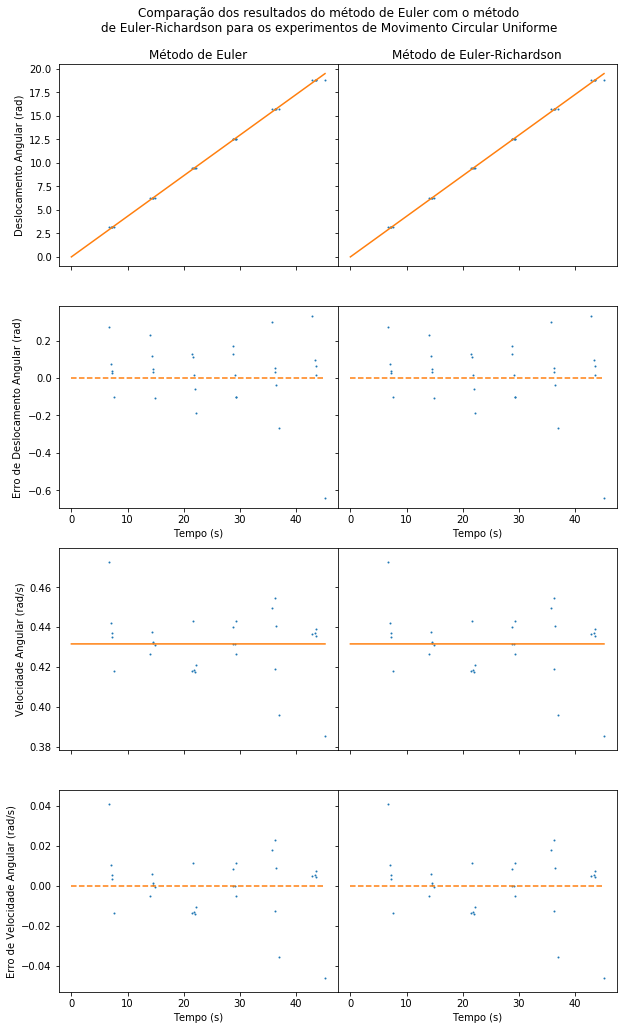

In [9]:
############### MCU ###############

plot_modelos(ce, euc1, euc2, ['theta', 'w'], labels = ['Deslocamento Angular', 'Velocidade Angular'], units = ['rad', 'rad/s'], exp = 'Movimento Circular Uniforme')


Como já era de se esperar devido à maior simplicidade desse movimento, os resultados para os modelos ficaram bastante de acordo com os valores experimentais. Além disso, como o gráfico do deslocamento é uma reta, vale pontuar que os métodos de Euler e Euler-Richardson apresentam exatamente os mesmos resultados, uma vez que a variação do gráfico é constante e igual em ambos.

#### 3.2.3 Movimento Pendular

Finalmente, a equação de movimento para o pêndulo pode ser dada por

$\cfrac{d^2 \theta}{dt^2} = - \text{11,959} \text{sen}(\theta(t)) - \text{0,025} \cfrac{d\theta}{dt} \left|\cfrac{d\theta}{dt}\right|$

Abaixo, os gráficos referentes a essa equação

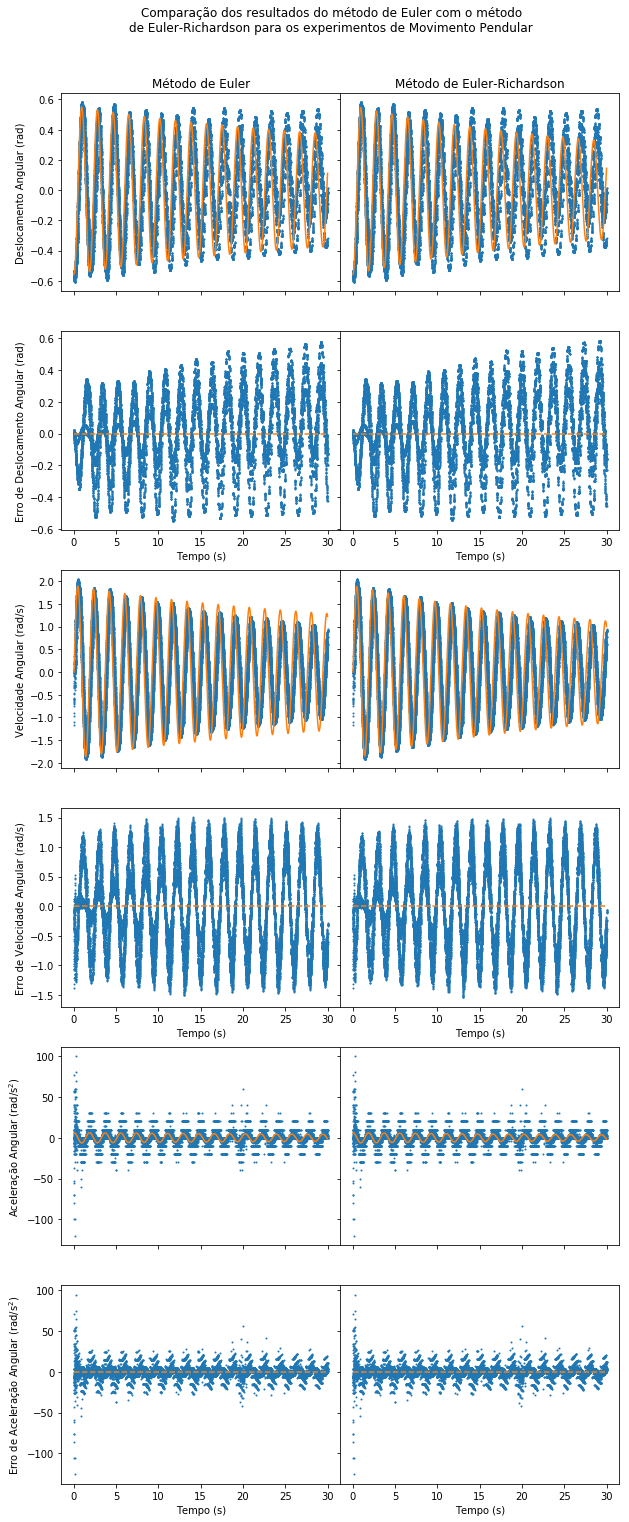

In [10]:
############# Pêndulo #############  

plot_modelos(pe, eup1, eup2, ['theta', 'w', 'a'], labels = ['Deslocamento Angular', 'Velocidade Angular', 'Aceleração Angular'], units = ['rad', 'rad/s', r'rad/s$^2$'], exp = 'Movimento Pendular')


Olhando exclusivamente para o formato dos gráficos de ambos os modelos, ambos seguem um padrão bastante adequado aos pontos experimentais. Porém, em todos há uma clara diferença no período entre os gráficos dos modelos e os dados experimentais e essa diferença vai se tornando mais visível conforme o tempo aumenta.

Além disso, o gráfico do modelo dado pelo método de Euler-Richardson parece ter ficado mais de acordo com os dados experimentais, principalmente para a velocidade angular.

**Animações**


<IPython.core.display.Javascript object>


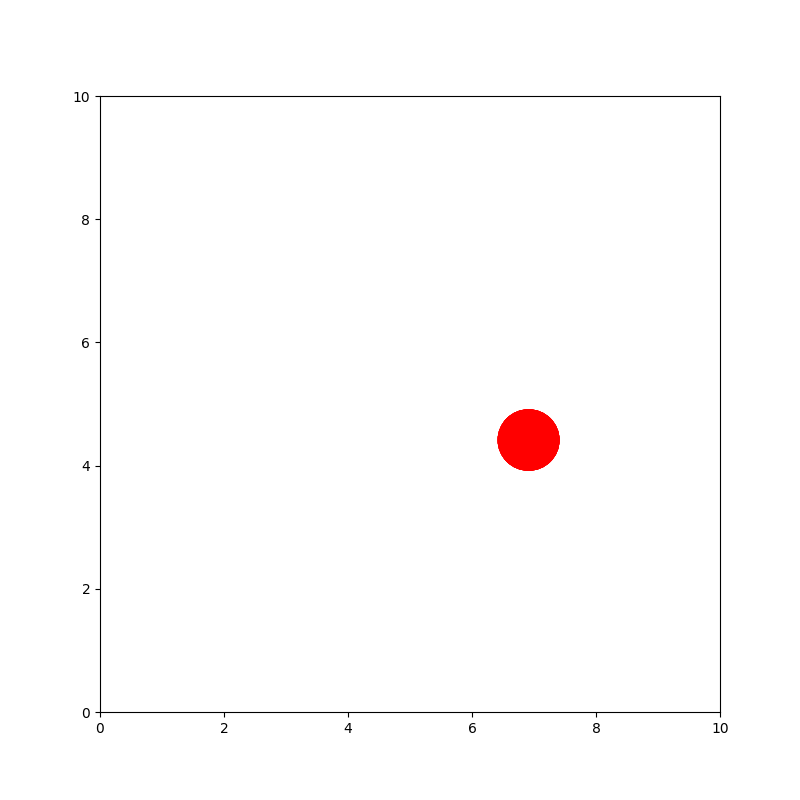

In [11]:
%matplotlib notebook


#cria objeto figura e inicializa o canvas para a animação
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(8, 8)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((5, 5), 0.50, fc='r')



#funções animate e init requeridas pela função FuncAnimation
def animate(i):
    '''
    essa função é chamada pela função FuncAnimation
    a cada iteração ela plota com um i diferente
    
    i: ângulo do circulo em relação ao eixo x    
    '''
    x, y = patch.center
    x = 5 + 2 * np.sin(np.radians(i))
    y = 5 + 2 * np.cos(np.radians(i))
    patch.center = (x, y)
    return patch,

def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    return patch,

#plotando a animação

anim = FuncAnimation(fig, animate, init_func=init, frames=360, 
                               interval=20, blit=True)

plt.show()

<IPython.core.display.Javascript object>


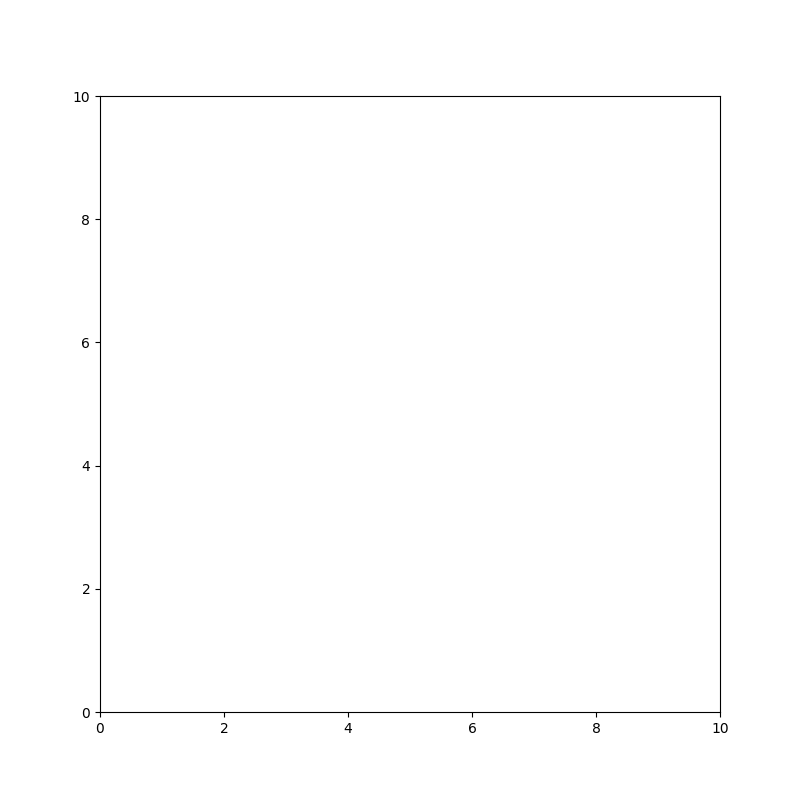

In [12]:
%matplotlib notebook
#cria objeto figura e inicializa o canvas para a animação
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(8, 8)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((2, 5), 0.25, fc='r')



#funções animate e init requeridas pela função FuncAnimation
def animate(i):
    '''
    essa função é chamada pela função FuncAnimation
    a cada iteração ela plota com um i diferente

    i: ângulo do circulo em relação ao eixo x
    '''
    x, y = patch.center
    theta = math.pi / 6.0 #30 graus de inclinação da rampa
    x = 0.5 + (math.cos(theta) * (9.80665/40000 * i ** 2))
    y = 7.5 - (math.sin(theta) * (9.80665/40000 * i ** 2))
    patch.center = (x, y)
    return patch,

def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    return patch,

#plotando a animação

anim = FuncAnimation(fig, animate, init_func=init, frames=720,
interval=10, blit=True)

plt.show()

<IPython.core.display.Javascript object>


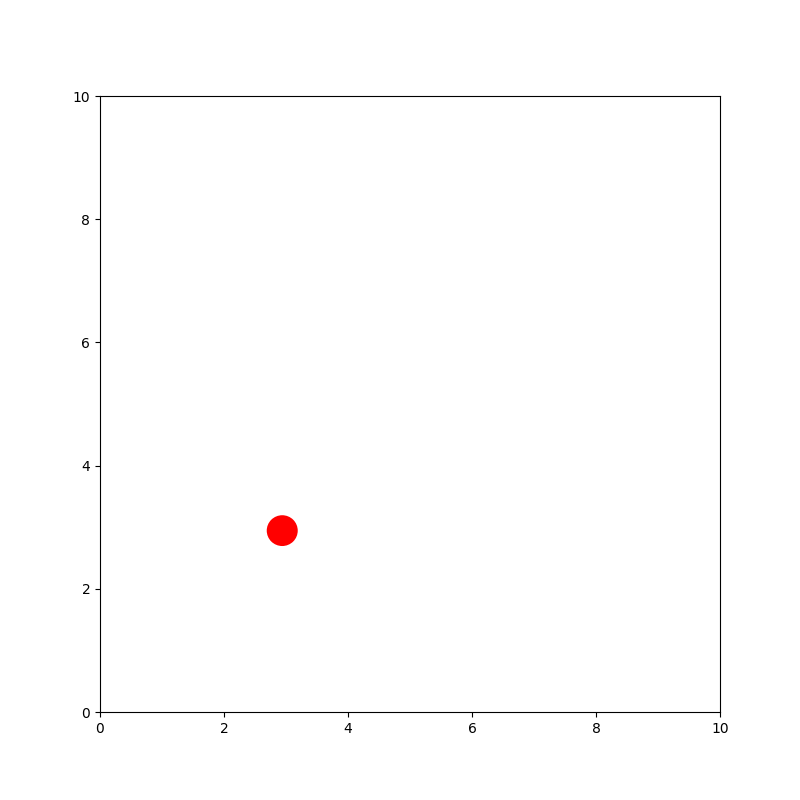

In [13]:
def nextOmegaEulerCromer(omega, theta, g, l, delta):
    r = omega - (g/l) * theta * delta
    return r

def nextThetaEulerCromer(omega, theta, g, l, delta):
    r = theta + omega * delta
    return r
    
#cria objeto figura e inicializa o canvas para a animação
fig = plt.figure()
fig.set_dpi(100)
fig.set_size_inches(8, 8)

ax = plt.axes(xlim=(0, 10), ylim=(0, 10))
patch = plt.Circle((2, 5), 0.25, fc='r')
l = 5
g = 9.80665
omega0 = math.sqrt(g/l)
theta0 = math.pi / 4.0

#funções animate e init requeridas pela função FuncAnimation
def animate(i):
    '''
    essa função é chamada pela função FuncAnimation
    a cada iteração ela plota com um i diferente
    
    i: ângulo do circulo em relação ao eixo x    
    '''
    global theta0
    global omega0
    x, y = patch.center
    x = 5 + l * math.sin(theta0)
    y = 7.5 - l * math.cos(theta0)
    omega0 = nextOmegaEulerCromer(omega0, theta0, g, l, 0.01)
    theta0 = nextThetaEulerCromer(omega0, theta0, g, l, 0.01)
    patch.center = (x, y)
    return patch,

def init():
    patch.center = (5, 5)
    ax.add_patch(patch)
    return patch,

#plotando a animação

anim = FuncAnimation(fig, animate, init_func=init, frames=1440, 
                               interval=10, blit=True)

#plt.show()

## 4 Interpretação e descrição dos experimentos
##### Movimentos escolhidos:
Os movimentos escolhidos para a realização do EP2 foram o Movimento
Circular Uniforme, o Movimento Pendular e o Bloco em Rampa. Antes
dos experimentos serem realizados, foram obtidas as equações dos movi-
mentos, para podermos decidir quais seriam as variáveis utilizadas que
precisarı́amos obter para cada um.

##### Experimentos:
* Movimento Circular Uniforme
Para esse experimento, uma pessoa ficou parada em um ponto fixo (um
quadrado pequeno no chão), podendo apenas girar em torno de si mesma;
enquanto outra pessoa ficava a uma distância de 2,10m da pessoa fixa, com
ambas segurando uma corda esticada. A pessoa no lado externo, então,
realizava um movimento circular constante, usando um metrônomo para
determinar o ritmo enquanto uma terceira pessoa media o tempo para
completar cada volta. Foram realizadas três voltas consecutivas, com 5
repetições.

* Movimento Pendular
Nesse, foi utilizado um cesto de 5,1cm de largura e 14,4cm de comprimento,
com um celular dentro, preso a quatro cordas de mesmo comprimento (≈
65cm), em cada uma das pontas do cesto, para simular um pêndulo simples
com corda de tamanho L. O “pêndulo”era, então, solto com um ângulo
inicial de aproximadamente 45° e era deixado oscilando por um tempo de
cerca de 30s, enquanto o celular media a velocidade angular do mesmo
com o Physics Toolbox. Esse experimento foi repetido 5 vezes.

* Bloco em rampa
Para o bloco em rampa, foi utilizado um carrinho de Lego ® , para simular
um deslizamento sem atrito, com um celular dentro. O bloco era então
solto do alto de uma rampa de 3,64m de comprimento e 6° de inclinação,
enquanto o celular media a aceleração linear do mesmo com o Physics
Toolbox. Esse experimento também foi repetido 5 vezes.



## 5 Crítica

 Encontramos dificuldades inicialmente para realizar os experimentos de maneira que pudesseos coletar todos os
dados necessários para a modelagem dos movimentos. Os maiores desafios encontrados para o EP até agora foram conseguir um
lugar adequado para fixar o pêndulo, garantir que o bloco descesse a rampa em linha reta e pensar em como fazer um Movimento Circular Uniforme que fosse o tão uniforme e circular quanto possı́vel. Para o problema do pêndulo, conseguimos achar uma árvore que, convenientemente possuı́a um galho em forma de gancho, enquanto que, para o problema com o bloco em rampa, utilizamos duas cordas esticadas paralelamente às laterais do carrinho para servirem de guia.
 Alguns parâmetros foram aproximados para melhor adequação dos resultados nos gráficos, mas todos os dados coletados nos experimentos estavam muito próximos dos resultados esperados pelo modelo teórico, entretando foi necessário a limpeza dos dados coletados pelo aplicativo Physics Toolbox para que a visualização ficasse melhor.
Outra difilcudade foi fazer as animações usando o matplotlib pois apesar da interface ser relativamente simples, a documentação para a parte das animações não é muito extensa nem detalhada.



## 6 Registro

- Realização do experimento
- Anotação dos dados
- Gravação do vídeo
- Edição do video e upload no youtube
- Criação do código de plotagem e analise dos dados e dos erros
- Criação dos gráficos
- Estruturação e redação do relatório